# Today's Coding Topics
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/xiangshiyin/data-programming-with-python/blob/main/2023-summmer/2023-07-12/notebook/concept_and_code_demo.ipynb)

* Hands-on machine learning model analysis example (continued)

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.max_rows=None
pd.options.display.max_columns=None

# Special topic: OOP (object oriented programming)

In [2]:
x = 1 # variables

In [3]:
1, 'a', True, [1,2,3], (1,2,3), {'a':1} # data

(1, 'a', True, [1, 2, 3], (1, 2, 3), {'a': 1})

In [4]:
if True: # condition
    print('True')

True


In [5]:
while True: # loop - while
    break

In [ ]:
for i in range(3): # loop - for
    print(i)

In [6]:
def afunction(x): # function
    print(x)
    

In [8]:
afunction(2) # execute the function

2


## creating a class

In [20]:
class table: # we just defined a new data type, or a new "class"
    def __init__(self, l, w):
        self.length = l # attribute
        self.width = w # attribute
        self.can_hold_things = True # attribute
    def calculate_tabletop_area(self): # method
        area = self.length * self.width
        print(area)
    def testing_the_method(self): # another method
        self.calculate_tabletop_area()

In [21]:
table_a = table(l=2, w=3) # I just created a table, named table_a

In [22]:
table_b = table(l=3, w=4) # I just created another table, named table_b

In [23]:
table_a.testing_the_method()

6


In [14]:
x = int(2)

In [15]:
y = int(3)

In [16]:
type(x), type(y)

(int, int)

In [18]:
table_a.length, table_a.width, table_a.can_hold_things

(2, 3, True)

In [19]:
table_b.length, table_b.width, table_b.can_hold_things

(3, 4, True)

# Hands-On Example (continued)

The example is captured from the following book:
* Aur´elien G´eron *Hands-On Machine Learning with Scikit-Learn and TensorFlow* O’Reilly Media, 2019. (Chapter 2)

## Source
This dataset is a modified version of the California Housing dataset available from [Luís Torgo's page](http://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html) (University of Porto). Luís Torgo obtained it from the StatLib repository (which is closed now). The dataset may also be downloaded from StatLib mirrors.

This dataset appeared in a 1997 paper titled *Sparse Spatial Autoregressions* by Pace, R. Kelley and Ronald Barry, published in the *Statistics and Probability Letters* journal. They built it using the 1990 California census data. It contains one row per census block group. A block group is the smallest geographical unit for which the U.S. Census Bureau publishes sample data (a block group typically has a population of 600 to 3,000 people).

## Tweaks
The dataset in this directory is almost identical to the original, with two differences:

* 207 values were randomly removed from the `total_bedrooms` column, so we can discuss what to do with missing data.
* An additional categorical attribute called `ocean_proximity` was added, indicating (very roughly) whether each block group is near the ocean, near the Bay area, inland or on an island. This allows discussing what to do with categorical data.

Note that the block groups are called "districts" in the Jupyter notebooks, simply because in some contexts the name "block group" was confusing.

## Define the problem to solve

### The big picture
* Goal: Build a model to predict median housing price of any given "district" based on the California census data
* Attributes you can expect in the dataset: population, median income, and median housing price for each block group



### Frame the problem

**Questions to ask first**

* How will the model fit into the bigger product plan
![](../pics/workflow-architecture.png)

* What's the current solution, if there is any?

**Frame the problem**

* Is it a supervised, unsupervised, semi-supervised, or reinforcement learning problem?
* Is it a regression problem, a classification problem, or something else?

**Find an appropriate performance measure**

* The RMSE (root mean squared error)
$$
RMSE(X,h) = \sqrt{ \frac{1}{m}\sum_{i=1}^{m}(h(x^{(i)})-y^{(i)})^2 }
$$

![](https://nextjournal.com/data/QmfPuPp4V74FyvTTojMj6ix9T8Skj1ji4GhX5Pr6zK8w4N?filename=linear-regression.png&content-type=image/png)

* $R^2$
    * Reference: https://en.wikipedia.org/wiki/Coefficient_of_determination
    
$$
R^2 = \frac{SS_{reg}}{SS_{Total}} = \frac{\sum_{i=1}^m(h(x^{(i)})-\bar{y})^2}{\sum_{i=1}^m(h(x^{(i)})-\bar{y})^2}= 1 - \frac{SS_{residual}}{SS_{Total}} = 1 - \frac{\sum_{i=1}^m(h(x^{(i)})-y^{(i)})^2}{\sum_{i=1}^m(h(x^{(i)})-\bar{y})^2}
$$

![](https://miro.medium.com/max/2812/1*o6okB-rex13szaQYNiHeKQ.png)

## Get the data, explore the data structure

### The data from high level

In [25]:
housing = pd.read_csv('../data/housing.csv',sep=',',header=0)
housing.head(3)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY


In [26]:
housing.shape

(20640, 10)

In [27]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


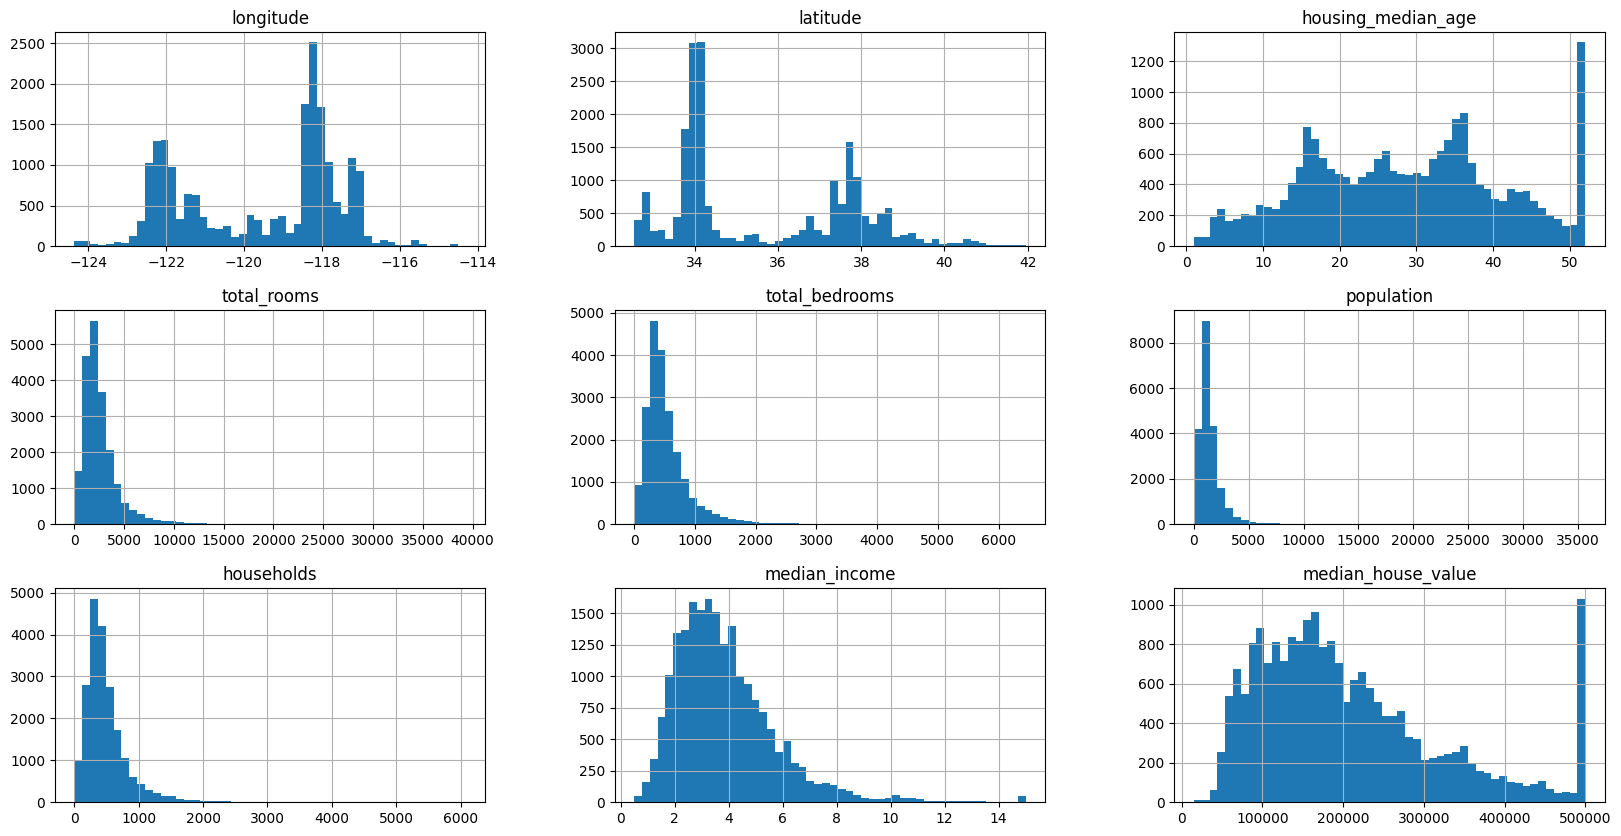

In [28]:
housing.hist(bins=50, figsize=(20,10))
plt.show()

In [30]:
df_proxy_stats = housing.ocean_proximity.value_counts().reset_index().rename(columns={'count':'rowcount'})
df_proxy_stats['pcnt'] = df_proxy_stats.rowcount/df_proxy_stats.rowcount.sum()
df_proxy_stats

,ocean_proximity,rowcount,pcnt
0,<1H OCEAN,9136,0.442636
1,INLAND,6551,0.317393
2,NEAR OCEAN,2658,0.128779
3,NEAR BAY,2290,0.110950
4,ISLAND,5,0.000242


### Correlation analysis

In [32]:
housing.select_dtypes(include=np.number).corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000


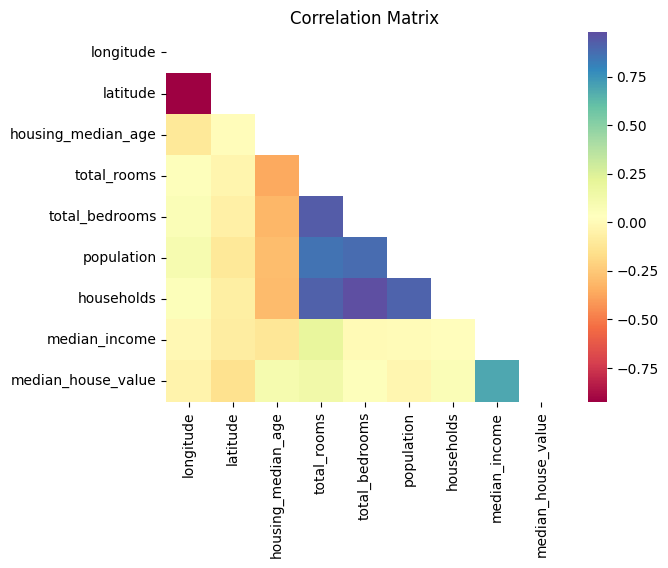

In [33]:
corrs = housing.select_dtypes(include=np.number).corr()

# we can also create a map to cover half of the matrix
mask = np.zeros_like(corrs)
# find the indices of the upper triangle of the given matrix
## https://numpy.org/doc/stable/reference/generated/numpy.triu_indices_from.html
mask[np.triu_indices_from(mask)] = True

sns.heatmap(corrs, cmap='Spectral', mask=mask)
plt.title('Correlation Matrix')
plt.show()

<span style="color:red">
Be careful on the multi-colinearities here!!!
</span>

## train-test split

### Pure random sampling

In [34]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(
    housing, test_size=0.2, random_state=123
)


In [35]:
train_set.shape

(16512, 10)

In [36]:
test_set.shape

(4128, 10)

**Is this sampling good enough??**

### Keep an eye on the `median_income` column

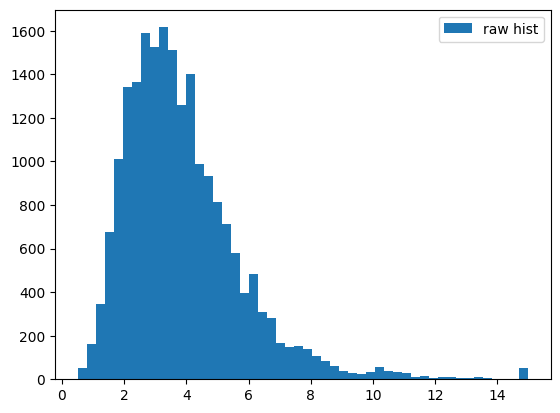

In [37]:
plt.hist(housing.median_income,bins=50,label='raw hist')
plt.legend()
plt.show()

In [38]:
## check the cdf of the median_income distribution
df_cdf_median_income = housing.median_income.sort_values(ascending=True).reset_index()
df_cdf_median_income['cum_freq'] = np.arange(1,len(df_cdf_median_income)+1)
df_cdf_median_income['cum_prob'] = df_cdf_median_income['cum_freq']/df_cdf_median_income['cum_freq'].shape[0]
df_cdf_median_income.drop(columns=['index'],inplace=True)

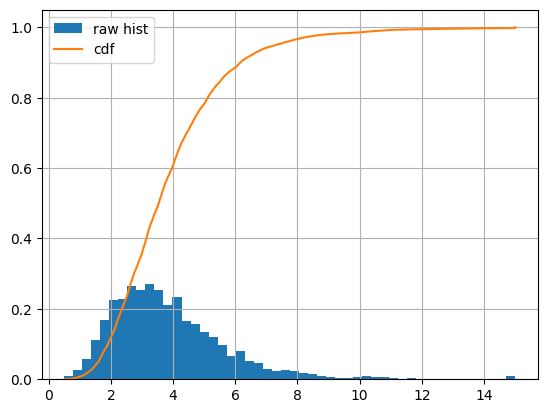

In [39]:
plt.hist(housing.median_income,bins=50,label='raw hist',density=True)
plt.plot(df_cdf_median_income.median_income,df_cdf_median_income.cum_prob,label='cdf')
plt.legend()
plt.grid()
plt.show()

**Some further grouping**

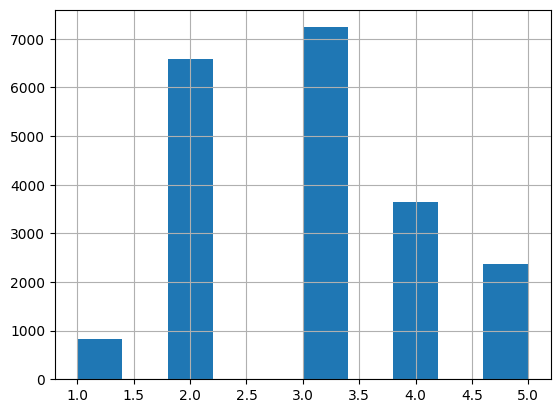

In [40]:
housing['income_cat'] = pd.cut(
    x = housing['median_income'],
    bins = [0,1.5,3.0,4.5,6, np.inf],
    labels = [1,2,3,4,5]
)

plt.hist(housing.income_cat)
plt.grid()
plt.show()

In [41]:
housing.income_cat.value_counts().reset_index()

,income_cat,count
0,3,7236
1,2,6581
2,4,3639
3,5,2362
4,1,822


### Stratified sampling on `median_income`

In [42]:
from sklearn.model_selection import StratifiedShuffleSplit

sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=123)
for train_index, test_index in sss.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [43]:
## let's compare the median_income distribution via the two random splitting methodologies

train_set, test_set = train_test_split(
    housing, test_size=0.2, random_state=123
)

compare_props = pd.DataFrame({
    "Overall": housing.income_cat.value_counts()/housing.shape[0],
    "Stratified": strat_test_set["income_cat"].value_counts()/len(strat_test_set),
    "Random": test_set["income_cat"].value_counts()/len(test_set),
}).sort_index()
compare_props["Rand. %error"] = 100 * compare_props["Random"]/compare_props["Overall"] - 100
compare_props["Strat. %error"] = 100 * compare_props["Stratified"]/compare_props["Overall"] - 100
compare_props

,Overall,Stratified,Random,Rand. %error,Strat. %error
income_cat,,,,,
1,0.039826,0.039971,0.038760,-2.676399,0.364964
2,0.318847,0.318798,0.313227,-1.762650,-0.015195
3,0.350581,0.350533,0.360465,2.819237,-0.013820
4,0.176308,0.176357,0.178779,1.401484,0.027480
5,0.114438,0.114341,0.108769,-4.953429,-0.084674


In [44]:
### A easier way to do stratified sampling

strat_train_set2, strat_test_set2 = train_test_split(
    housing, test_size=0.2, random_state=123, stratify=housing['income_cat']
)

compare_props = pd.DataFrame({
    "Overall": housing.income_cat.value_counts()/housing.shape[0],
    "Stratified": strat_test_set["income_cat"].value_counts()/len(strat_test_set),
    "Stratified2": strat_test_set2["income_cat"].value_counts()/len(strat_test_set2),
    "Random": test_set["income_cat"].value_counts()/len(test_set),
}).sort_index()
compare_props["Rand. %error"] = 100 * compare_props["Random"]/compare_props["Overall"] - 100
compare_props["Strat. %error"] = 100 * compare_props["Stratified"]/compare_props["Overall"] - 100
compare_props

,Overall,Stratified,Stratified2,Random,Rand. %error,Strat. %error
income_cat,,,,,,
1,0.039826,0.039971,0.039971,0.038760,-2.676399,0.364964
2,0.318847,0.318798,0.318798,0.313227,-1.762650,-0.015195
3,0.350581,0.350533,0.350533,0.360465,2.819237,-0.013820
4,0.176308,0.176357,0.176357,0.178779,1.401484,0.027480
5,0.114438,0.114341,0.114341,0.108769,-4.953429,-0.084674


### finalize the train-test split

In [45]:
strat_train_set.drop(columns=['income_cat'],inplace=True)
strat_test_set.drop(columns=['income_cat'],inplace=True)

## More visualization on the data

### housing price by geo location

In [46]:
housing2 = strat_train_set.copy()

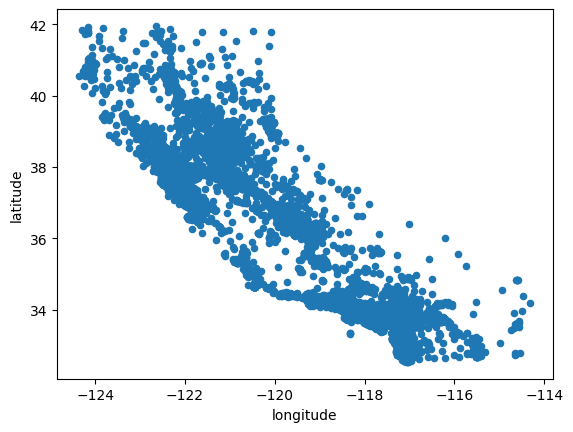

In [47]:
housing2.plot(kind="scatter", x="longitude", y="latitude")
plt.show()

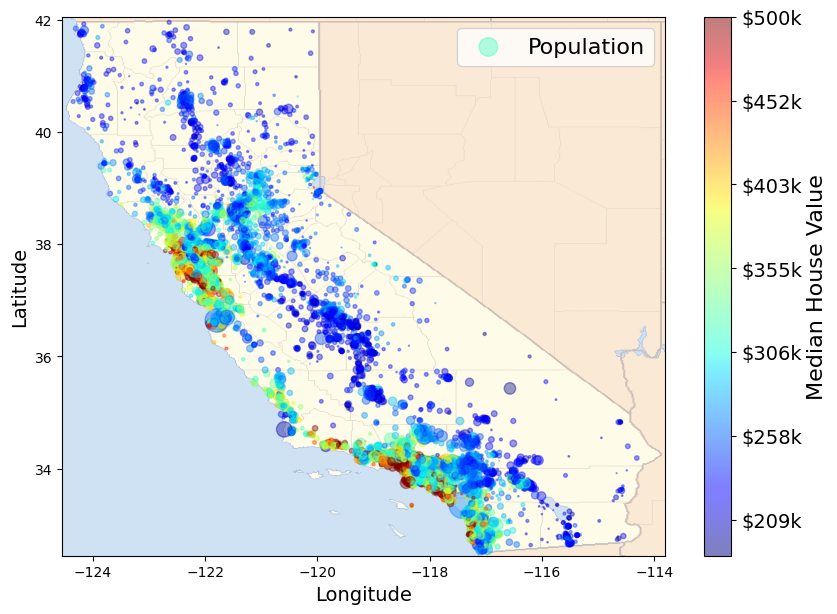

In [48]:
## make the map visualization even fancier

import matplotlib.image as mpimg
california_img=mpimg.imread('../pics/california.png')
ax = housing2.plot(kind="scatter", x="longitude", y="latitude", figsize=(10,7),
                       s=housing2['population']/100, label="Population",
                       c="median_house_value", cmap=plt.get_cmap("jet"),
                       colorbar=False, alpha=0.4,
                      )
plt.imshow(california_img, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.5,
           cmap=plt.get_cmap("jet"))
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)

prices = housing2["median_house_value"]
tick_values = np.linspace(prices.min(), prices.max(), 11)
cbar = plt.colorbar(ticks=tick_values/prices.max())
cbar.ax.set_yticklabels(["$%dk"%(round(v/1000)) for v in tick_values], fontsize=14)
cbar.set_label('Median House Value', fontsize=16)

plt.legend(fontsize=16)
plt.show()


### revisit the correlation analysis

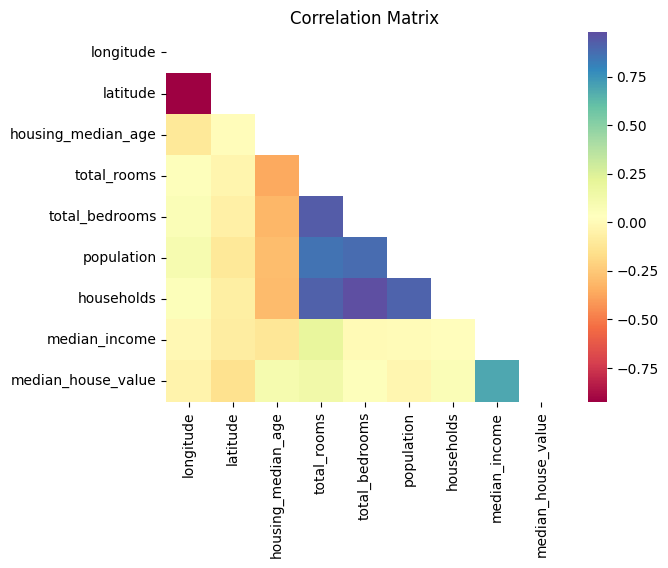

In [49]:
corr_matrix = housing2.select_dtypes(include=np.number).corr()

# we can also create a map to cover half of the matrix
mask = np.zeros_like(corr_matrix)
# find the indices of the upper triangle of the given matrix
## https://numpy.org/doc/stable/reference/generated/numpy.triu_indices_from.html
mask[np.triu_indices_from(mask)] = True

sns.heatmap(corrs, cmap='Spectral', mask=mask)
plt.title('Correlation Matrix')
plt.show()

In [50]:
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688825
total_rooms           0.135388
housing_median_age    0.110918
households            0.067539
total_bedrooms        0.050226
population           -0.022426
longitude            -0.046091
latitude             -0.144711
Name: median_house_value, dtype: float64

**Observations**
* The most promising attribute to predict the `median_house_value` is the `median_income`.
* There are some multicolinearity present among `total_rooms`, `total_bedrooms`, `population`, and `households`

## Add more features

In [51]:
housing2["rooms_per_household"] = housing2["total_rooms"]/housing2["households"]
housing2["bedrooms_per_room"] = housing2["total_bedrooms"]/housing2["total_rooms"]
housing2["population_per_household"]=housing2["population"]/housing2["households"]

In [52]:
corr_matrix = housing2.select_dtypes(include=np.number).corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.688825
rooms_per_household         0.145367
total_rooms                 0.135388
housing_median_age          0.110918
households                  0.067539
total_bedrooms              0.050226
population_per_household   -0.022016
population                 -0.022426
longitude                  -0.046091
latitude                   -0.144711
bedrooms_per_room          -0.259627
Name: median_house_value, dtype: float64

## Prepare the data for the model fitting

In [53]:
housing2 = strat_train_set.drop(columns='median_house_value') # the Xs
housing2_labels = strat_train_set['median_house_value'].copy() # the y

In [54]:
housing2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16512 entries, 20198 to 14678
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16350 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
 8   ocean_proximity     16512 non-null  object 
dtypes: float64(8), object(1)
memory usage: 1.3+ MB


### fix the null value

In [55]:
housing2[housing2.total_bedrooms.isnull()].shape

(162, 9)

In [56]:
housing2.shape

(16512, 9)

1. Get rid of the corresponding districts.

2. Get rid of the whole attribute.

3. Set the values to some value (zero, the mean, the median, etc.).

```python
housing.dropna(subset=["total_bedrooms"]) # option 1
housing.drop("total_bedrooms", axis=1) # option 2
median = housing["total_bedrooms"].median() # option 3
housing["total_bedrooms"].fillna(median, inplace=True)
```

**test the option 3**

In [57]:
sample_incomplete_rows = housing2[housing2.isnull().any(axis=1)].head()
sample_incomplete_rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
1606,-122.08,37.88,26.0,2947.0,NaN,825.0,626.0,2.9330,NEAR BAY
13656,-117.30,34.05,6.0,2155.0,NaN,1039.0,391.0,1.6675,INLAND
11441,-117.98,33.73,18.0,3833.0,NaN,2192.0,996.0,3.4679,<1H OCEAN
10216,-117.91,33.87,29.0,1121.0,NaN,762.0,276.0,2.5000,<1H OCEAN
4447,-118.21,34.07,52.0,1770.0,NaN,1848.0,439.0,2.4135,<1H OCEAN


In [58]:
median = housing2["total_bedrooms"].median()
sample_incomplete_rows["total_bedrooms"].fillna(median, inplace=True)
sample_incomplete_rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
1606,-122.08,37.88,26.0,2947.0,435.0,825.0,626.0,2.9330,NEAR BAY
13656,-117.30,34.05,6.0,2155.0,435.0,1039.0,391.0,1.6675,INLAND
11441,-117.98,33.73,18.0,3833.0,435.0,2192.0,996.0,3.4679,<1H OCEAN
10216,-117.91,33.87,29.0,1121.0,435.0,762.0,276.0,2.5000,<1H OCEAN
4447,-118.21,34.07,52.0,1770.0,435.0,1848.0,439.0,2.4135,<1H OCEAN


In [59]:
sample_incomplete_rows.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5 entries, 1606 to 4447
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           5 non-null      float64
 1   latitude            5 non-null      float64
 2   housing_median_age  5 non-null      float64
 3   total_rooms         5 non-null      float64
 4   total_bedrooms      5 non-null      float64
 5   population          5 non-null      float64
 6   households          5 non-null      float64
 7   median_income       5 non-null      float64
 8   ocean_proximity     5 non-null      object 
dtypes: float64(8), object(1)
memory usage: 400.0+ bytes


**The `scikit-learn` way to implement option 3**
* reference: https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html

In [60]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median") # transformer

In [61]:
## Only the total_bedrooms attribute had missing values
## but we cannot be sure that there won’t be any missing values in new data after the system goes live
housing_num = housing2.drop(columns='ocean_proximity')
imputer.fit(housing_num)

SimpleImputer(strategy='median')

**Further breakdown of the parameters**

In [62]:
imputer.strategy

'median'

In [63]:
## The imputation fill value for each feature
imputer.statistics_

array([-118.5   ,   34.26  ,   29.    , 2127.5   ,  435.    , 1165.    ,
        410.    ,    3.5391])

In [64]:
housing_num.median().values

array([-118.5   ,   34.26  ,   29.    , 2127.5   ,  435.    , 1165.    ,
        410.    ,    3.5391])

In [65]:
## apply the transformation
X = imputer.transform(housing_num)

In [66]:
type(X)

numpy.ndarray

In [67]:
X.shape

(16512, 8)

**The even simpler `scikit-learn` way**

In [68]:
imputer = SimpleImputer(strategy="median")
housing_num = housing2.drop(columns='ocean_proximity')
X = imputer.fit_transform(housing_num) # one-stop

In [69]:
X.shape

(16512, 8)

In [70]:
type(X)

numpy.ndarray

In [71]:
df_X = pd.DataFrame(X, columns=housing_num.columns, index=housing_num.index)
df_X.head(3)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
20198,-119.19,34.26,16.0,5018.0,853.0,2524.0,830.0,5.1752
2092,-119.78,36.75,43.0,2070.0,512.0,1925.0,444.0,1.4635
16668,-120.69,35.25,15.0,4210.0,899.0,1933.0,867.0,2.7940


In [72]:
df_X.shape

(16512, 8)

In [73]:
df_X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16512 entries, 20198 to 14678
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16512 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
dtypes: float64(8)
memory usage: 1.1 MB


### Encode the text and categorical attributes

In [74]:
housing2.ocean_proximity.value_counts().reset_index()

,ocean_proximity,count
0,<1H OCEAN,7306
1,INLAND,5249
2,NEAR OCEAN,2125
3,NEAR BAY,1829
4,ISLAND,3


* reference: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OrdinalEncoder.html

In [75]:
## approach 1
from sklearn.preprocessing import OrdinalEncoder

housing_cat = housing2[['ocean_proximity']]
ordinal_encoder = OrdinalEncoder() # transformer
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:10]

array([[4.],
       [1.],
       [4.],
       [0.],
       [0.],
       [3.],
       [0.],
       [1.],
       [3.],
       [0.]])

In [76]:
housing_cat[:10]

,ocean_proximity
20198,NEAR OCEAN
2092,INLAND
16668,NEAR OCEAN
10941,<1H OCEAN
17350,<1H OCEAN
15645,NEAR BAY
3889,<1H OCEAN
18987,INLAND
16005,NEAR BAY
3938,<1H OCEAN


In [77]:
type(housing_cat_encoded)

numpy.ndarray

In [78]:
pd.Series(housing_cat_encoded.flatten()).value_counts()

0.0    7306
1.0    5249
4.0    2125
3.0    1829
2.0       3
Name: count, dtype: int64

In [79]:
ordinal_encoder.categories_ # the order is aligned with the encoding values

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [80]:
## reconstruct the mapping

In [81]:
df_map_ordinalencoder = pd.DataFrame({
    'ocean_proximity': ordinal_encoder.categories_[0],
    'encoded_ocean_proximity': np.arange(housing2.ocean_proximity.nunique())
})
df_map_ordinalencoder

,ocean_proximity,encoded_ocean_proximity
0,<1H OCEAN,0
1,INLAND,1
2,ISLAND,2
3,NEAR BAY,3
4,NEAR OCEAN,4


In [82]:
## we could also customize the encoding order
housing_cat = housing2[['ocean_proximity']]
ordinal_encoder = OrdinalEncoder(categories=[['INLAND','<1H OCEAN','ISLAND','NEAR BAY','NEAR OCEAN']])
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
ordinal_encoder.categories_

[array(['INLAND', '<1H OCEAN', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [83]:
pd.DataFrame({
    'ocean_proximity': ordinal_encoder.categories_[0],
    'encoded_ocean_proximity': np.arange(housing2.ocean_proximity.nunique())
})

,ocean_proximity,encoded_ocean_proximity
0,INLAND,0
1,<1H OCEAN,1
2,ISLAND,2
3,NEAR BAY,3
4,NEAR OCEAN,4


<span style="color:red">
The order reflected in the encoding values isn't aligned with the intrinsic mutual relations in the original categories
</span>

**The `OneHot` encoding**

![](https://i.imgur.com/mtimFxh.png)

$$
y = \beta_0 + \beta_1X_1 + \beta_2X_2 + ... + \beta_mX_m + \beta_{m+1}D_{red} + \beta_{m+2}D_{yellow} + \beta_{m+3}D_{green}
$$

* The additional features created from `OneHot` encoding are also called `dummy variables`
* The encoding makes sure the phase space of all categories in a variable are orthogonal to each other
* As you can see, the above linear regression fitting only changes the intercept when changing the dummy variable values.
* You could make it even fancier just so you could also change the slope !!!

$$
y = \beta_0 + \beta_1X_1 + \beta_2X_2 + ... + \beta_mX_m + \beta_{m+1}D_{red} + \beta_{m+2}D_{yellow} + \beta_{m+3}D_{green} + \beta_{m+1}D_{red}X_1 + \beta_{m+2}D_{yellow}X_2 + \beta_{m+3}D_{green}X_3
$$

* reference: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html

In [84]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [86]:
housing_cat_1hot.toarray()

array([[0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.]])

In [87]:
housing_cat_1hot.toarray().shape

(16512, 5)

In [88]:
## if you prefer not to use the sparse matrix representation

cat_encoder = OneHotEncoder(sparse_output=False)
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

array([[0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.]])

In [89]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [90]:
cat_encoder.feature_names_in_

array(['ocean_proximity'], dtype=object)

In [91]:
## we could also validate the onehot encoding mapping
categories = cat_encoder.categories_[0]
categories

array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
      dtype=object)

In [92]:
categories_df = pd.DataFrame(categories, columns=['ocean_proximity'])

In [93]:
one_hot_mapping = cat_encoder.transform(categories_df)

In [94]:
one_hot_mapping

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

In [95]:
onehot_comprison = np.c_[categories, one_hot_mapping]
df_onehot_comprison = pd.DataFrame(onehot_comprison, columns=['ocean_proximity','d1','d2','d3','d4','d5'])
df_onehot_comprison

,ocean_proximity,d1,d2,d3,d4,d5
0,<1H OCEAN,1.0,0.0,0.0,0.0,0.0
1,INLAND,0.0,1.0,0.0,0.0,0.0
2,ISLAND,0.0,0.0,1.0,0.0,0.0
3,NEAR BAY,0.0,0.0,0.0,1.0,0.0
4,NEAR OCEAN,0.0,0.0,0.0,0.0,1.0


### Recap all the transformations covered

In [96]:
housing2.head(3)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
20198,-119.19,34.26,16.0,5018.0,853.0,2524.0,830.0,5.1752,NEAR OCEAN
2092,-119.78,36.75,43.0,2070.0,512.0,1925.0,444.0,1.4635,INLAND
16668,-120.69,35.25,15.0,4210.0,899.0,1933.0,867.0,2.7940,NEAR OCEAN


**Recap on the data transformations we tried so far**
* Fix missing values in numeric columns/features (with median values)
* `OneHot` encode categorical variables `ocean_proximity`
* Add additional features: 
    * `rooms_per_household`
    * `bedrooms_per_room`
    * `population_per_household`
* Feature scaling (<span style="color:red">To Do</span>)

### All transformations in One Step

In [97]:
## split X and y
housing2 = strat_train_set.drop(columns='median_house_value')
housing2_labels = strat_train_set['median_house_value'].copy()
## split numeric and categorical variables
housing_num = housing2.drop(columns='ocean_proximity')
housing_cat = housing2[['ocean_proximity']]

## fill missing values in numeric features
from sklearn.impute import SimpleImputer
num_imputer = SimpleImputer(strategy="median") # transformer 1
X_num = num_imputer.fit_transform(housing_num)

## onehot encode ocean_proximity
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder(sparse_output=False) # transformer 2
X_cat = cat_encoder.fit_transform(housing_cat)

## create new features
rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6
rooms_per_household = X_num[:, rooms_ix] / X_num[:, households_ix]
population_per_household = X_num[:, population_ix] / X_num[:, households_ix]
bedrooms_per_room = X_num[:, bedrooms_ix] / X_num[:, rooms_ix]

## append the new features to X_num
X_num = np.c_[
    X_num,
    rooms_per_household,
    population_per_household,
    bedrooms_per_room
]

## feature scaling
from sklearn.preprocessing import StandardScaler
num_scaler = StandardScaler() # transformer 3
X_num = num_scaler.fit_transform(X_num)

## combine numeric and categorical features
housing2_prepared = np.c_[X_num, X_cat]

In [98]:
X_num.shape

(16512, 11)

In [99]:
X_cat.shape

(16512, 5)

In [100]:
housing2_prepared.shape

(16512, 16)

* A lot of coding here!!!

### Try the `pipeline` function in `sklearn`

![](https://iaml.it/blog/optimizing-sklearn-pipelines/images/pipeline-diagram.png)

* reference: https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html

In [102]:
## build a customized transformer to append new features

from sklearn.base import BaseEstimator, TransformerMixin

rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

class AppendNewFeatures(BaseEstimator, TransformerMixin):
    def __init__(self): # no *args or **kargs
        pass
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
        return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]


In [103]:
## test the module

attr_adder = AppendNewFeatures()
housing_extra_attribs = attr_adder.transform(housing2.values)
housing_extra_attribs[:3]

array([[-119.19, 34.26, 16.0, 5018.0, 853.0, 2524.0, 830.0, 5.1752,
        'NEAR OCEAN', 6.04578313253012, 3.040963855421687,
        0.16998804304503787],
       [-119.78, 36.75, 43.0, 2070.0, 512.0, 1925.0, 444.0, 1.4635,
        'INLAND', 4.662162162162162, 4.335585585585585,
        0.24734299516908212],
       [-120.69, 35.25, 15.0, 4210.0, 899.0, 1933.0, 867.0, 2.794,
        'NEAR OCEAN', 4.855824682814302, 2.229527104959631,
        0.2135391923990499]], dtype=object)

Build a pipeline for preprocessing the numerical attributes

In [104]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('attribs_adder', AppendNewFeatures()),
        ('std_scaler', StandardScaler())
    ])

In [105]:
## test the pipeline
housing_num2 = num_pipeline.fit_transform(housing_num)
housing_num2.shape

(16512, 11)

We could also create one pipeline to handle both numeric and categorical variables

In [106]:
from sklearn.compose import ColumnTransformer

num_attribs = list(housing_num.columns)
cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])

In [107]:
housing2.head(3)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
20198,-119.19,34.26,16.0,5018.0,853.0,2524.0,830.0,5.1752,NEAR OCEAN
2092,-119.78,36.75,43.0,2070.0,512.0,1925.0,444.0,1.4635,INLAND
16668,-120.69,35.25,15.0,4210.0,899.0,1933.0,867.0,2.7940,NEAR OCEAN


In [108]:
housing2_prepared2 = full_pipeline.fit_transform(housing2)

In [109]:
housing2_prepared2.shape

(16512, 16)

In [110]:
housing2_prepared.shape

(16512, 16)

## Train a model

In [111]:
housing2_prepared = full_pipeline.fit_transform(housing2)

In [112]:
type(housing2_prepared)

numpy.ndarray

### Fit a linear regression model

In [114]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression() # predictor
lin_reg.fit(housing2_prepared, housing2_labels)

LinearRegression()

**Evaluate the model on the training data set**

In [115]:
housing2_predictions = lin_reg.predict(housing2_prepared)
housing2_predictions[:5]

array([280530.00273942,  55311.87946976, 235094.01555609, 168812.68377393,
       264281.66155767])

In [116]:
from sklearn.metrics import mean_squared_error

housing2_predictions = lin_reg.predict(housing2_prepared)
lin_reg_mse = mean_squared_error(housing2_labels, housing2_predictions)
lin_reg_rmse = np.sqrt(lin_reg_mse)
lin_reg_rmse

68164.22481237905

In [117]:
lin_reg.score(housing2_prepared, housing2_labels)

0.6510530092581517

**Evaluate the model on the test data set**

In [118]:
strat_test_set.head(3)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
11620,-118.05,33.84,21.0,4890.0,653.0,2295.0,654.0,6.9830,329700.0,<1H OCEAN
2124,-119.70,36.80,34.0,1768.0,303.0,888.0,314.0,3.8088,87700.0,INLAND
8315,-118.33,33.34,52.0,2359.0,591.0,1100.0,431.0,2.8333,414700.0,ISLAND


In [119]:
## split X and y
test_data = strat_test_set.drop(columns='median_house_value')
test_labels = strat_test_set['median_house_value'].copy()

## prepare the test data
test_data_prepared = full_pipeline.transform(test_data)

## predict on the test data
test_labels_predicted = lin_reg.predict(test_data_prepared)

In [120]:
test_data_prepared.shape

(4128, 16)

In [121]:
test_labels[:5].values

array([329700.,  87700., 414700., 200000.,  98100.])

In [122]:
test_labels_predicted[:5]

array([314576.29991819, 148285.91909018, 409995.35243211, 200653.21780813,
        94923.73552613])

In [123]:
## evaluate the RMSE

from sklearn.metrics import mean_squared_error

lin_mse = mean_squared_error(test_labels, test_labels_predicted)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68834.77869935521

In [124]:
lin_reg.score(test_data_prepared, test_labels)

0.6441587993257818

### Fit a decision tree regression model

In [125]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor() # predictor
tree_reg.fit(housing2_prepared, housing2_labels)

DecisionTreeRegressor()

**Evaluate the model on the training data set**

In [126]:
housing2_predictions = tree_reg.predict(housing2_prepared)
tree_mse = mean_squared_error(housing2_labels, housing2_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

<span style="color:red">
There is definitely an overfitting issue here!
</span>

## Evaluate model with (k-fold) Cross-Validation

Reference on cross-validation
* https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html
* https://scikit-learn.org/stable/modules/cross_validation.html
* About the `scoring` parameter: https://scikit-learn.org/stable/modules/model_evaluation.html

![](https://upload.wikimedia.org/wikipedia/commons/c/c7/LOOCV.gif)

In [127]:
%%time

## check the performance of the tree model
from sklearn.model_selection import cross_val_score

tree_reg = DecisionTreeRegressor(random_state=123)
scores = cross_val_score(
        tree_reg, 
        housing2_prepared, 
        housing2_labels,
        scoring="neg_mean_squared_error", 
        cv=10
)
tree_rmse_scores = np.sqrt(-scores)

CPU times: user 2.34 s, sys: 20.4 ms, total: 2.36 s
Wall time: 2.38 s


In [128]:
tree_rmse_scores

array([70834.02858176, 69387.05099508, 68352.63848368, 69310.02055378,
       73585.09485804, 69581.79343327, 72152.48896785, 72159.23883695,
       71937.83778591, 72391.91129702])

In [129]:
tree_rmse_scores.mean()

70969.21037933372

In [130]:
tree_rmse_scores.std()

1633.0116989174446

In [131]:
## check the linear regression

lin_reg = LinearRegression()
scores = cross_val_score(
        lin_reg, 
        housing2_prepared, 
        housing2_labels,
        scoring="neg_mean_squared_error", 
        cv=10
)
lin_rmse_scores = np.sqrt(-scores)

In [132]:
lin_rmse_scores

array([68678.87753959, 69515.72386152, 64287.16395217, 68999.13935173,
       67542.64392411, 66169.06666367, 70457.92610968, 70546.3521802 ,
       70171.21779186, 68635.31904899])

In [133]:
lin_rmse_scores.mean()

68500.34304235232

In [134]:
lin_rmse_scores.std()

1903.757115345997

In [135]:
%%time

## check the random forest regressor

from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=100, random_state=123)
forest_reg.fit(housing2_prepared, housing2_labels)

housing2_predictions = forest_reg.predict(housing2_prepared)
forest_mse = mean_squared_error(housing2_labels, housing2_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

CPU times: user 18.4 s, sys: 199 ms, total: 18.6 s
Wall time: 18.8 s


18583.84715845564

In [121]:
%%time

from sklearn.model_selection import cross_val_score

forest_scores = cross_val_score(
        forest_reg, 
        housing2_prepared, 
        housing2_labels,
        scoring="neg_mean_squared_error", 
        cv=10
)
forest_rmse_scores = np.sqrt(-forest_scores)
forest_rmse_scores

CPU times: user 2min 24s, sys: 691 ms, total: 2min 25s
Wall time: 2min 25s


array([49865.35585078, 50481.1673736 , 46092.28465036, 49930.87403122,
       49984.05024536, 48290.13187458, 50323.09802059, 50578.37410456,
       52808.17664877, 51472.00928436])

In [122]:
forest_rmse_scores.mean()

49982.55220841822

In [123]:
forest_rmse_scores.std()

1701.0909513618387

<span style="color:red">
The random forest model seems promising! Although there still seem to be some overfitting :-(
</span>

## Fine-tune the model

![](https://developer.qualcomm.com/sites/default/files/attachments/learning_resources_03-05.png)

* reference on `GridSearch`: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

In [136]:
%%time

from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]}
  ]

forest_reg = RandomForestRegressor(random_state=123)
grid_search = GridSearchCV(forest_reg, param_grid, cv=3,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search.fit(housing2_prepared, housing2_labels)

CPU times: user 24.3 s, sys: 348 ms, total: 24.6 s
Wall time: 24.8 s


GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=123),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [138]:
grid_search.best_params_

{'max_features': 6, 'n_estimators': 30}

In [140]:
grid_search.best_estimator_

RandomForestRegressor(max_features=6, n_estimators=30, random_state=123)

In [141]:
grid_search.cv_results_

{'mean_fit_time': array([0.08107845, 0.22412539, 0.62188991, 0.10887965, 0.33925573,
        0.97584208, 0.14253942, 0.46066928, 1.36322093, 0.19130286,
        0.5890557 , 1.77104441]),
 'std_fit_time': array([0.01423702, 0.01663424, 0.01776042, 0.00241119, 0.00035455,
        0.00428562, 0.0014657 , 0.00170372, 0.01073365, 0.00422313,
        0.00779619, 0.00437927]),
 'mean_score_time': array([0.00513665, 0.01377122, 0.03934463, 0.00446542, 0.01264056,
        0.03923257, 0.00428526, 0.01365534, 0.03807235, 0.00493344,
        0.01143726, 0.03732427]),
 'std_score_time': array([0.00043604, 0.00182698, 0.00071038, 0.00039969, 0.00116932,
        0.000294  , 0.00033436, 0.00102904, 0.00060831, 0.00043464,
        0.00043249, 0.00145514]),
 'param_max_features': masked_array(data=[2, 2, 2, 4, 4, 4, 6, 6, 6, 8, 8, 8],
              mask=[False, False, False, False, False, False, False, False,
                    False, False, False, False],
        fill_value='?',
             dtype=obj

In [142]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

63084.112470001186 {'max_features': 2, 'n_estimators': 3}
55473.984798805606 {'max_features': 2, 'n_estimators': 10}
53148.49336278817 {'max_features': 2, 'n_estimators': 30}
59997.96220726512 {'max_features': 4, 'n_estimators': 3}
52873.21999059696 {'max_features': 4, 'n_estimators': 10}
50644.372848296574 {'max_features': 4, 'n_estimators': 30}
60288.59343937777 {'max_features': 6, 'n_estimators': 3}
52835.73019030012 {'max_features': 6, 'n_estimators': 10}
50471.58775525328 {'max_features': 6, 'n_estimators': 30}
60211.9116349675 {'max_features': 8, 'n_estimators': 3}
53143.233027270755 {'max_features': 8, 'n_estimators': 10}
50738.95248675663 {'max_features': 8, 'n_estimators': 30}


### Check the feature importance of the best model

In [143]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([7.62563881e-02, 6.74149165e-02, 4.25047714e-02, 1.79329344e-02,
       1.71063638e-02, 1.78570939e-02, 1.59581292e-02, 3.35037152e-01,
       6.01574011e-02, 1.07031148e-01, 7.18542937e-02, 1.11092710e-02,
       1.46712563e-01, 1.97481271e-04, 4.62381998e-03, 8.24627252e-03])

In [144]:
extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)

[(0.335037152317998, 'median_income'),
 (0.1467125627218961, 'INLAND'),
 (0.10703114833106614, 'pop_per_hhold'),
 (0.07625638814036223, 'longitude'),
 (0.07185429374428413, 'bedrooms_per_room'),
 (0.06741491647399334, 'latitude'),
 (0.060157401056779074, 'rooms_per_hhold'),
 (0.0425047713721149, 'housing_median_age'),
 (0.017932934355797996, 'total_rooms'),
 (0.01785709385141697, 'population'),
 (0.017106363752004382, 'total_bedrooms'),
 (0.015958129165696278, 'households'),
 (0.011109270950154123, '<1H OCEAN'),
 (0.008246272516593134, 'NEAR OCEAN'),
 (0.004623819978918063, 'NEAR BAY'),
 (0.00019748127092505437, 'ISLAND')]

In [145]:
df_feature_importance = pd.DataFrame({
    'attributes':attributes,
    'importance':feature_importances
}).sort_values(by='importance',ascending=False)
df_feature_importance

,attributes,importance
7,median_income,0.335037
12,INLAND,0.146713
9,pop_per_hhold,0.107031
0,longitude,0.076256
10,bedrooms_per_room,0.071854
1,latitude,0.067415
8,rooms_per_hhold,0.060157
2,housing_median_age,0.042505
3,total_rooms,0.017933
5,population,0.017857


## Final evaluation on the test dataset

In [146]:
final_model = grid_search.best_estimator_

final_predictions = final_model.predict(test_data_prepared)

final_mse = mean_squared_error(test_labels, final_predictions)
final_rmse = np.sqrt(final_mse)

In [147]:
final_rmse

49273.37661610159